In [17]:
# Importando bibliotecas que vão ser utilizadadas para a visualização dos dados para analisar a composição e correlação entre eles
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
# %matplotlib inline

In [18]:
# Lendo o arquivo tratado e reduzido anteriormente
database = pd.read_csv('DATABASE/base-reduzida-v5.csv', sep=',', encoding='utf-8', index_col=0)

In [19]:
df = database

In [20]:
# Visualizando o cabeçalho e alguns dados do dicionário
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
57,1.0,1.0,2.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
59,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
61,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
65,1.0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
94,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [21]:
# Verificando a quantidade de linhas e colunas do arquivo
df.shape

(16779, 16)

### Criando Funções Reutilizáveis

In [22]:
# Verificando como é a correlação das colunas do dataframe através de um heatmap
def Heatmap(df):
    fig, ax = plt.subplots(figsize=(10, 8))  # Definindo o tamanho da figura conforme necessário

    sns.heatmap(
        df.corr(),
        vmin=-1,
        vmax=+1,
        annot=False,
        cmap='YlGnBu',
        linewidths=0,
        ax=ax,
        linewidth=.5
    )

In [ ]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

In [ ]:
# Função para calcular outliers
def calcular_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]
    return len(outliers)

### Análise Exploratória

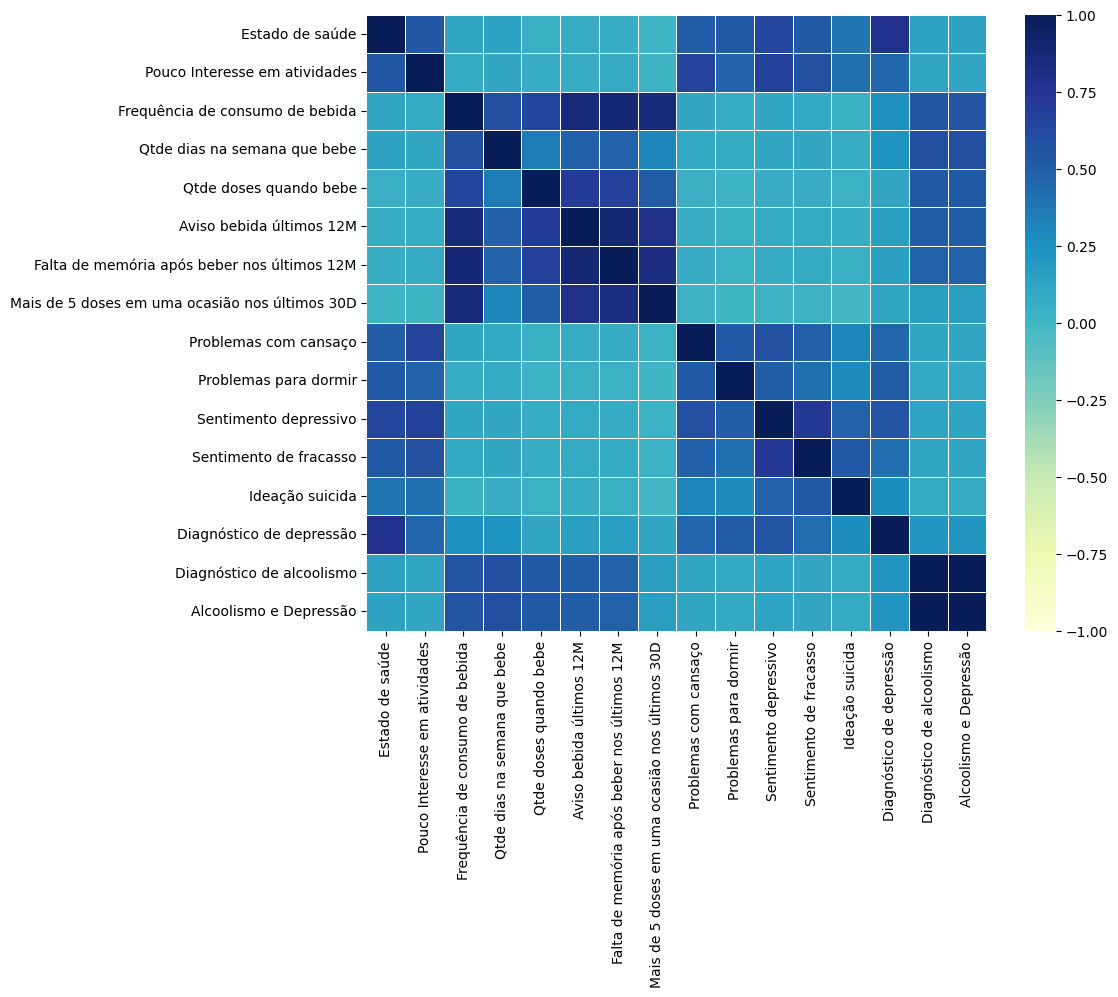

In [23]:
Heatmap(df)

(-1.0959123964264539,
 1.2045922128832287,
 -1.0975349604998244,
 1.1024647512311774)

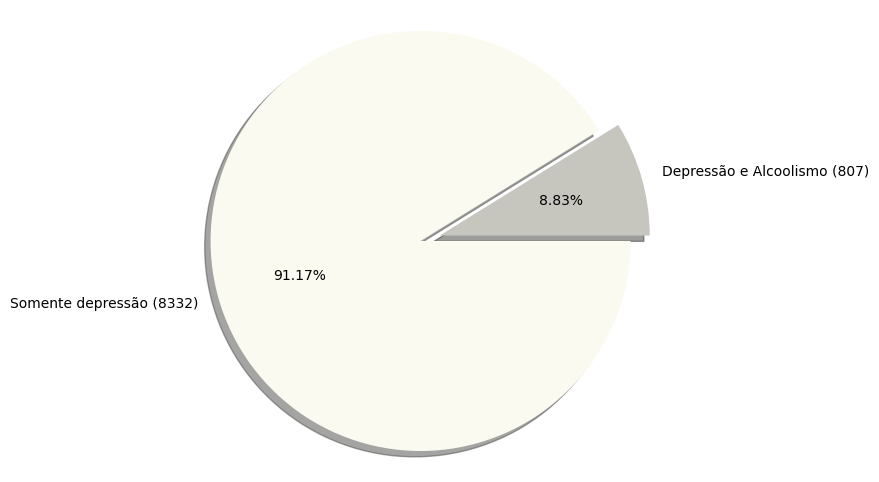

In [24]:
# Plotando um gráfico de pizza para analizar a proporção de Alcóolismo e depressão vs somente depressão
condicao_depressao = df['Diagnóstico de depressão'] == 1.0
df_so_depressao = df.loc[condicao_depressao]
a = df["Alcoolismo e Depressão"] == 1.0
depressao_e_alcoolismo = df.loc[a] 

QtdeD = len(df_so_depressao)
QtdeDeA = len(depressao_e_alcoolismo)

# Cria um rótulo para o gráfico de pizza
rotulo = [f'Depressão e Alcoolismo ({QtdeDeA})', f'Somente depressão ({QtdeD})']

# Valores para o gráfico de pizza
valores = [QtdeDeA, QtdeD]

# Cores para as fatias do gráfico
cores = ["#C6C6BF", "#FAFAF0"]

# Explode a primeira fatia (Dados A)
explode = (0.104, -0.009)

# Cria o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=rotulo, colors=cores, explode=explode, autopct='%1.2f%%', shadow=True)
plt.axis('equal')  # Para garantir que o gráfico seja uma circunferência

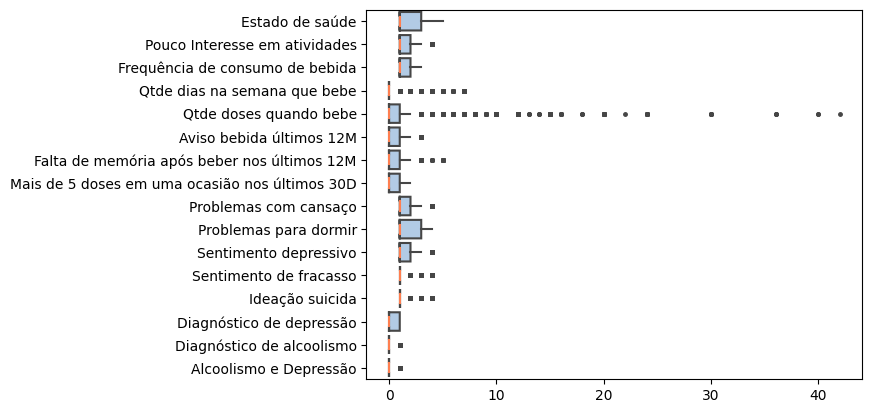

In [26]:
Outlier(df)

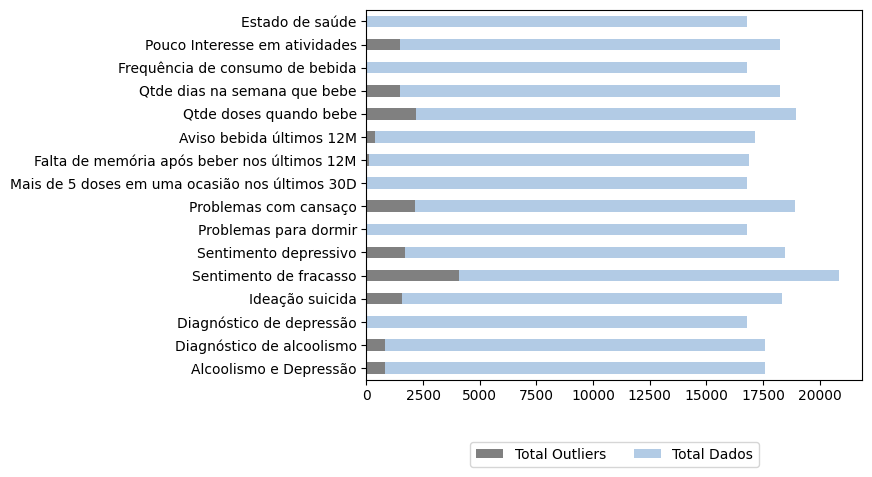

In [27]:
# Calcula o total de outliers para cada coluna
total_outliers_por_coluna = df.apply(calcular_outliers)

# Calcula o total de dados para cada coluna
total_dados_por_coluna = len(df)

# Define a ordem das colunas conforme o DataFrame original
ordem_das_colunas = df.columns

# Define a cor "Coral" e a cor "Cinza"
cor_coral = (.4, .6, .8, .5)  # RGB para Coral
cor_cinza = 'gray'

# Inverte a ordem das cores no gráfico de barras
cores = [cor_cinza, cor_coral]

# Reordenando as colunas da forma correta
colunas_invertidas = df.columns[::-1].tolist()

# Recriando o dataframe com a coluna invertida
dados_totais = pd.DataFrame({
    'Coluna': colunas_invertidas, 
    'Total Outliers': total_outliers_por_coluna[colunas_invertidas].values, 
    'Total Dados': [total_dados_por_coluna] * len(df.columns)
})

# Plotando o gráfico com a ordenação correta 
ax = dados_totais.set_index('Coluna').plot(kind='barh', stacked=True, color=cores)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.ylabel('')
plt.xlabel('')

plt.show()

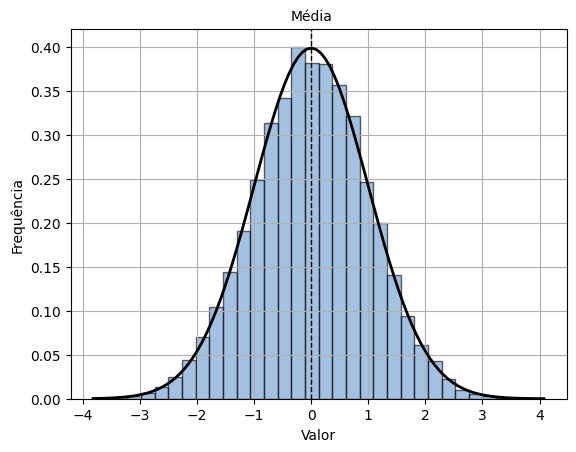

In [42]:
# Parâmetros da distribuição gaussiana
mu = 0  # Média
sigma = 1  # Desvio padrão
tamanho_amostra = len(df)  # Tamanho da amostra


# Gera dados normalmente distribuídos
dados = np.random.normal(mu, sigma, tamanho_amostra)

# Traça um histograma para visualizar a distribuição
count, bins, ignored = plt.hist(dados, bins=30, density=True, alpha=0.6, color=cor_coral, edgecolor='black')

# Adiciona uma 'best fit' linha para a PDF (Função de Densidade de Probabilidade)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Rótulos
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Adiciona uma linha vertical para a média
plt.axvline(mu, color='k', linestyle='dashed', linewidth=1)
altura_maxima = plt.ylim()[1] + 0.01
plt.text(mu, altura_maxima, 'Média', color = 'k', ha = 'center')

# Grade
plt.grid(True)

# Mostra o gráfico
plt.show()
